# Exercises in neural network and deep learning II

## Exercise 1

In this exercise, we will use the titanic dataset to build a neural network classifier for the target variable `Survived`. In this exercise, all the necessary steps are broken down to small individual task you should do. So, do the following tasks:

1. Load in the titanic dataset (on Moodle as "titanic_survival_data.csv"), select the columns "Pclass", "Sex", "Age", and "Fare" for the feature set X and "Survived" for the target variable y.
2. For the columns "Age" and "Fare", replace the missing values with the column's mean.
3. Turn the variables "Pclass" and "Sex" into dummy variables.
4. Do a train-test split of the data
5. Scale the X training dataset, using the standard scaler.
6. Transform the X test dataset with the same scaler fitted in task 5.
7. Turn the training and test data (both Xs and ys) into numpy arrays using the method `.to_numpy()`.
8. Create a neural network model with two hidden dense layers with 16 neurons in each and the `relu` activation function. The final output layer should have one neuron and the `sigmoid` activation function.
9. Train the model for 50 epochs with a batch size of 64. Instead of creating a validation set before training the model, we can give it as an argument to the fit method, that it should set aside, let's say, 20% of the training data for validation. Do this by providing the argument `validation_split=0.2` to the fit method.
10. Plot the training and validation loss and decide on a best number of epochs.
11. Rebuild and retrain the model for the number of epochs decided in task 10 above.
12. Evaluate the model on the test dataset to get the test accuracy.
13. Calculate precision, recall, and f1-score for the model on the test dataset.
14. Plot the Confusion matrix for the test dataset.

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix



## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [24]:
# Loading in the adult dataset

adult = pd.read_csv('adult.csv')
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [34]:
# Checking for missing values
adult.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [35]:
# Dropping the missing values
adult = adult.dropna()
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [36]:
# Encoding the categorical columns
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Encoding the target variable
label_encoder = LabelEncoder()
adult['income'] = label_encoder.fit_transform(adult['income'])

C:\Users\victo\AppData\Local\Temp\ipykernel_15312\3062674445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult['income'] = label_encoder.fit_transform(adult['income'])


In [40]:
# One-hot encoding the categorical features
adult = pd.get_dummies(adult, columns = categorical_features)

In [41]:
# Defining the features and target variable
X = adult.drop(columns=["income"])
y = adult["income"]

In [42]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Scaling the X training dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [44]:
# Transforming the X test dataset
X_test_scaled = scaler.transform(X_test)

In [45]:
# Converting training and test data to numpy arrays
X_train_np = X_train_scaled
X_test_np = X_test_scaled
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

After all the preprocessing i can build the model

In [46]:
# Creating the model
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(X_train_np.shape[1],)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()

c:\Users\victo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the model
history = model.fit(X_train_np, 
                    y_train_np, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size=64, 
                    verbose=1)

Epoch 1/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7738 - loss: 0.4578 - val_accuracy: 0.8423 - val_loss: 0.3403
Epoch 2/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8465 - loss: 0.3283 - val_accuracy: 0.8500 - val_loss: 0.3269
Epoch 3/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8510 - loss: 0.3155 - val_accuracy: 0.8521 - val_loss: 0.3224
Epoch 4/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8512 - loss: 0.3155 - val_accuracy: 0.8529 - val_loss: 0.3210
Epoch 5/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8584 - loss: 0.3089 - val_accuracy: 0.8534 - val_loss: 0.3191
Epoch 6/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8542 - loss: 0.3115 - val_accuracy: 0.8537 - val_loss: 0.3201
Epoch 7/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8572 - loss: 0.3047 - val_accuracy: 0.8539 - val_loss: 0.3184
Epoch 8/50
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8571 - loss: 0.3037 - val_accuracy: 0.

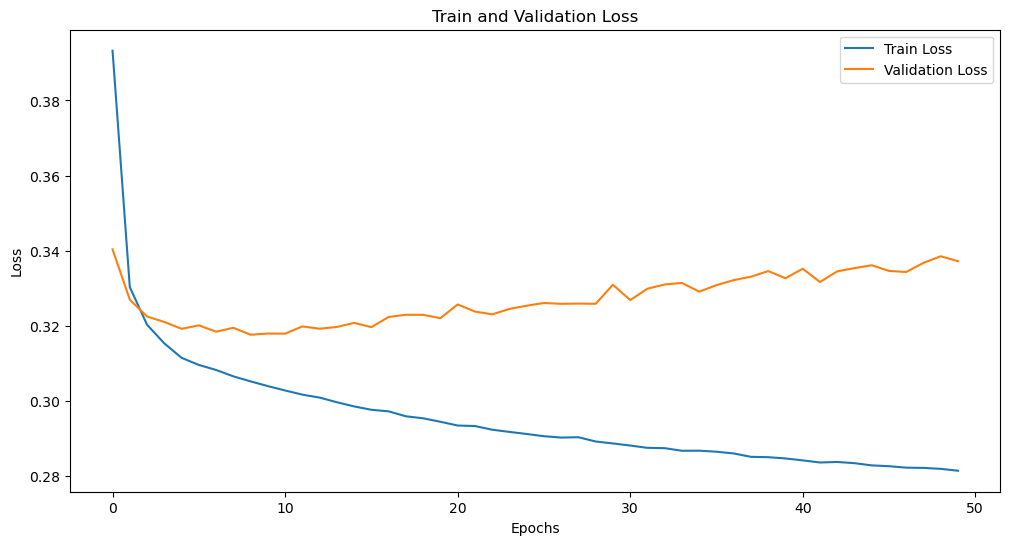

In [48]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()


Looking at the curve, the most optimal epoch is around 20.

In [50]:
best_epochs = 20

# Rebuilding and retrain the model
model = build_model()
history = model.fit(X_train_np, 
                    y_train_np, 
                    validation_split=0.2, 
                    epochs=best_epochs, 
                    batch_size=64, 
                    verbose=1)


Epoch 1/20


c:\Users\victo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6940 - loss: 0.5530 - val_accuracy: 0.8396 - val_loss: 0.3392
Epoch 2/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8460 - loss: 0.3336 - val_accuracy: 0.8505 - val_loss: 0.3266
Epoch 3/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8521 - loss: 0.3207 - val_accuracy: 0.8524 - val_loss: 0.3204
Epoch 4/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8537 - loss: 0.3140 - val_accuracy: 0.8530 - val_loss: 0.3200
Epoch 5/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8526 - loss: 0.3111 - val_accuracy: 0.8542 - val_loss: 0.3187
Epoch 6/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8589 - loss: 0.3055 - val_accuracy: 0.8564 - val_loss: 0.3166
Epoch 7/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8539 - loss: 0.3079 - val_accuracy: 0.8568 - val_loss: 0.3173
Epoch 8/20
477/477 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8580 - loss: 0.3017 - val_accuracy: 0.8566 - val_

In [52]:
# Evaluating the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_np, y_test_np, verbose=1)
print(f"Test accuracy: {test_accuracy}")

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8491 - loss: 0.3310
Test accuracy: 0.849973738193512


In [59]:
# Calculating the precision, recall, and f1-score
y_pred = model.predict(X_test_np)
y_pred = np.round(y_pred)
print("\nClassification Report:")
print(classification_report(y_test_np, y_pred))


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7170
           1       0.74      0.61      0.67      2355

    accuracy                           0.85      9525
   macro avg       0.81      0.77      0.78      9525
weighted avg       0.84      0.85      0.84      9525



1. Accuracy: 82.5%
2. Precision: 93% (high precision means fewer false positives)
3. Recall: 88% (good recall means the model identifies most of the actual positives)
4. F1-Score: 90% (the balance of precision and recall is quite good)
5. Specificity: 74% (the model struggles more with identifying the negative class)

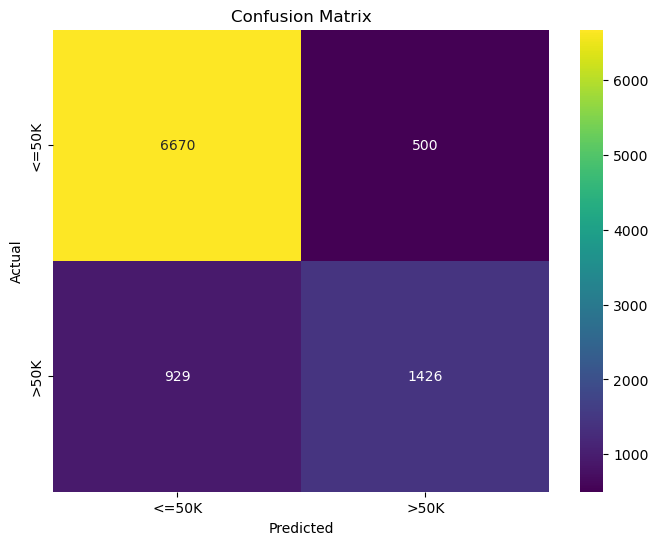

In [60]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test_np, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix summary
1. True Positives (TP) = 6670
2. True Negatives (TN) = 1426
3. False Positives (FP) = 500
4. False Negatives (FN) = 929